## Query a pdf document - FRTB-SA regulation

to run this notebook, you need to set the "OPENAI_API_KEY" environment variable on your pc

In [25]:
from doc_query_utils import create_embeddings, ask_question

In [26]:
# name of the pdf document to be analysed plus configuration settings 
cfg = {
    'PDF_DOC': 'd352.pdf', # this is the name of the pdf file to query
    'TEXT_PARTITION_SIZE': 1000, # number of characters per text partition
    'OVERLAP_PCT': 0.5, # defines how much partitions will overlap each other
    'DATA_FOLDER': 'data',
    # OPEN AI models
    'EMBEDDING_MODEL': 'text-embedding-ada-002',
    'GPT_MODEL': 'gpt-3.5-turbo',
    'EMBEDDING_ENCODING': 'cl100k_base'  # this the encoding for text-embedding-ada-002
}

The original pdf has been broken down into sections. Each section has been converted into a vector (a.k.a. "embedding") The question is also converted into an embedding vector. We then apply cosine similarity to "extract" the sections of the document that are most relevant to the question and include them in the prompt for the GPT model.

In [27]:
# get the embeddings
emb = create_embeddings(cfg, load_saved=True)

data\emb_d352.pkl
Loaded 529 embeddings, each of size 1,536


In [28]:
question1 = 'What is the definition of a Trading Book?'

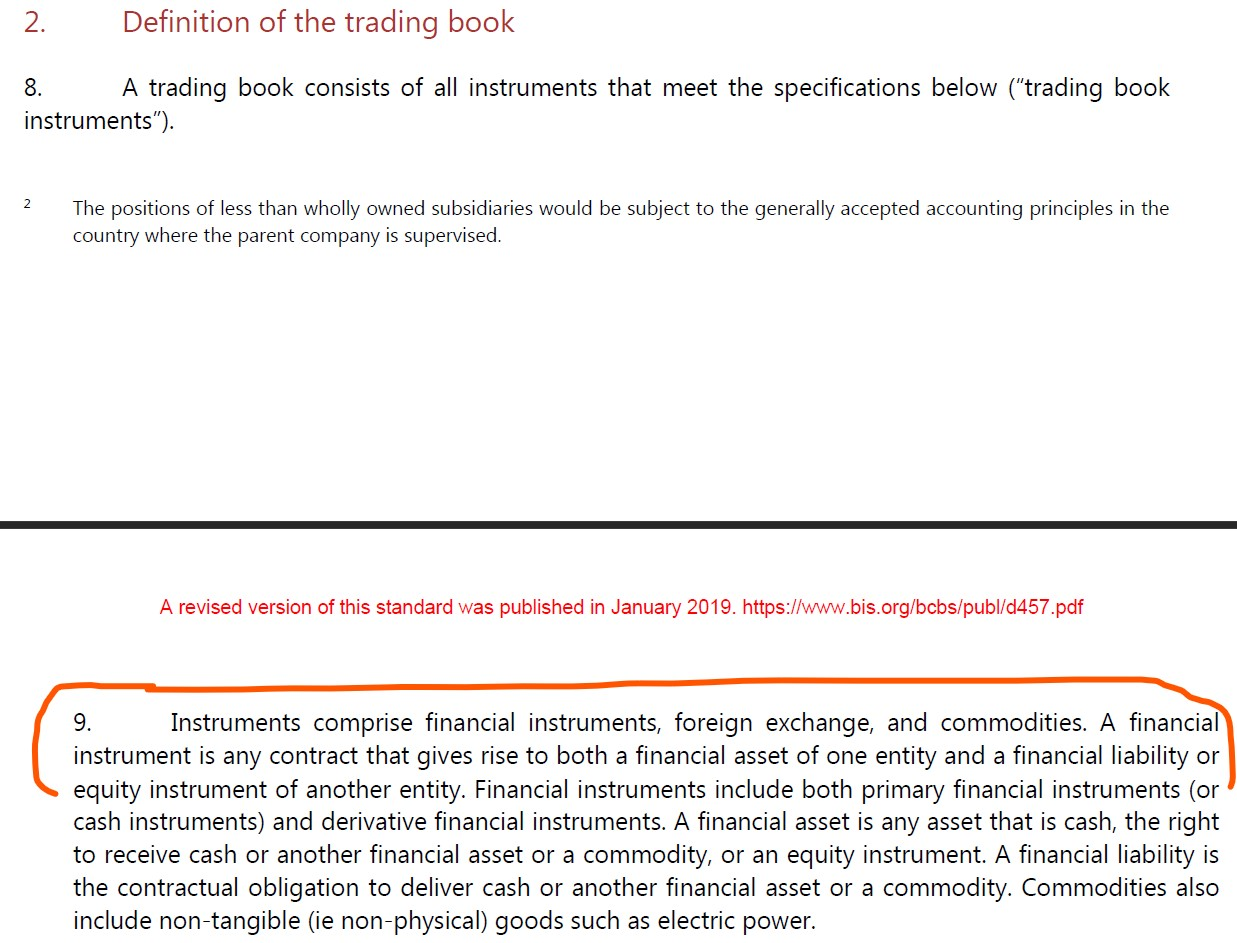

In [29]:
answer, info = ask_question(question1, emb, cfg, doc_specific=True, sim_threshold=0.85)

Answer: According to the document provided, a trading book is defined as consisting of all instruments that meet certain specifications, including financial instruments, foreign exchange, and commodities.


In [30]:
question2 = 'What is the treatment of counterparty credit risk within the trading book?'

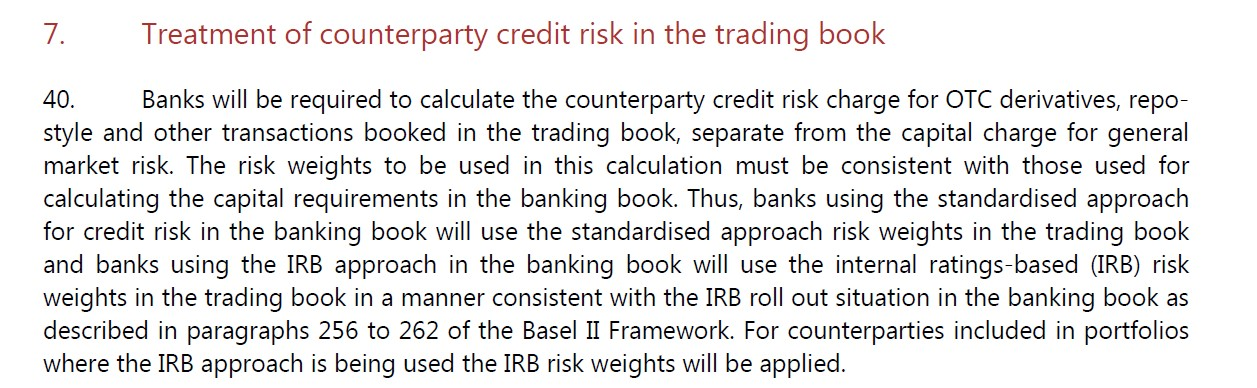

In [31]:
answer, info = ask_question(question2, emb, cfg, doc_specific=True, sim_threshold=0.85)

Answer: Counterparty credit risk within the trading book must be calculated separately from the capital charge for general market risk. The risk weights used for this calculation must be consistent with those used for calculating the capital requirements in the banking book. Banks using the standardised approach for credit risk in the banking book will use the standardised approach risk weights in the trading book, and banks using the IRB approach in the banking book will use the internal ratings-based (IRB) risk weights in the trading book in a manner consistent with the IRB roll-out situation in the banking book. The calculation of the counterparty credit risk charge for collateralised OTC derivative transactions is the same as the rules prescribed for such transactions booked in the banking book. The calculation of the counterparty charge for repo-style transactions will be conducted using the rules spelt out for such transactions booked in the banking book.
